In [1]:
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import BeginnersGraphs as ev
import ipywidgets as widgets
import pandas as pd

In [2]:
 ev.clean_directory('alterbbn_v2.2', 'alter_eta.c', if_PC=False)

['make', '-C', 'alterbbn_v2.2', 'alter_eta.c']

make: Circular alter_eta.c <- alter_eta.c dependency dropped.
bbn_constraints.c:18:2: warning: array index 4 is past the end of the array (which contains 4 elements) [-Warray-bounds]
        translate[4]=5;  // He3_H=ratioH[5]
        ^         ~
bbn_constraints.c:13:5: note: array 'translate' declared here
    int translate[4];
    ^
1 warning generated.



In [3]:
#Input: (set X as data you want)
#1 t(s), a, T (MeV), Tnu (MeV), #5 photons, baryons, rho_{nu}, drho_{nu}, phi (GeV^4), #10 rho_vs(GeV^4), sigma_rad (GeV^4), Y(n), Y(p), Y(2H), #15 Y(3H), Y(3He), Y(4He), Y(6Li), Y(7Li), #20 Y(7Be), eta
#X = 13
data_rows = {'D': 13,
             '7Li': 18,
             '7Be': 19}
col_labels = {'D': 'D',
              '7Li': r'${}^7$Li',
              '7Be': r'${}^7$Be'}

In [10]:
def Evo_Graph_Func(N,X):
    subprocess.run(['./alterbbn_v2.2/alter_eta.x', str(N)], capture_output = True, text = False) 
    data = np.loadtxt('evolution.out', delimiter=',', skiprows=1, usecols=range(21), unpack=True)
    column1 = data[2]
    columnD = data[X]
    DMax = np.max(columnD)
    DFinal = columnD[-1]
    max_y_index = np.argmax(columnD)
    DX_max = column1[max_y_index]
    return DFinal, DMax, DX_max

In [15]:
etaArr = np.linspace(1e-10, 1e-9, num = 10)
    

In [16]:
DFinal_list = []
DMax_list = []
DX_max_list = []
for N in etaArr:
    DFinal, DMax, DX_max = Evo_Graph_Func(N,data_rows['D'])
    DFinal_list.append(DFinal)
    DMax_list.append(DMax)
    DX_max_list.append(DX_max)
   
print("Eta Values:", etaArr)
print("DFinal values:", DFinal_list)
print("DMax values:", DMax_list)
print("DX_max values:", DX_max_list)

Eta Values: [1.e-10 2.e-10 3.e-10 4.e-10 5.e-10 6.e-10 7.e-10 8.e-10 9.e-10 1.e-09]
DFinal values: [0.000357352, 0.000111085, 5.74292e-05, 3.63771e-05, 2.5391e-05, 1.88144e-05, 1.46761e-05, 1.15328e-05, 9.37313e-06, 7.60086e-06]
DMax values: [0.00615849, 0.00479266, 0.00410293, 0.00362346, 0.00325315, 0.00296453, 0.00271608, 0.00248019, 0.00233481, 0.00221359]
DX_max values: [0.0639031, 0.0679571, 0.0696251, 0.0706228, 0.0714498, 0.0725913, 0.0727317, 0.0728207, 0.0742142, 0.0749373]


In [17]:
axs = [[None for i in range(3)] for j in range(3)]

In [23]:
eta = etaArr
p1 = DFinal_list
p2 = DMax_list
p3 = DX_max_list

data = [p1, p2, p3]
datalabels = [r'final', r'max', r'$T_{max}$', r'$\eta$']

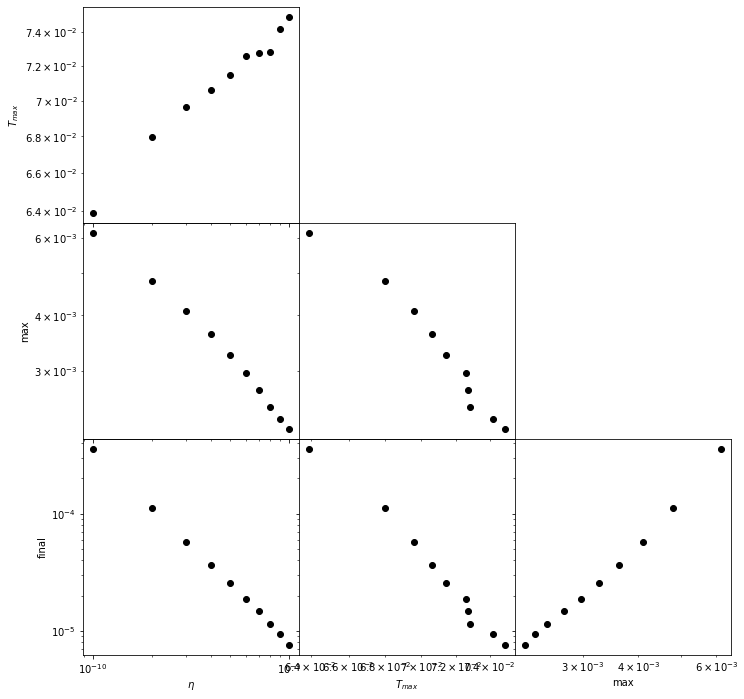

In [24]:
plt.figure(figsize=(10,10))
for i in range(3):
    for j in range(3-i):
        axs[i][j] = plt.axes([0.08 + 0.3 * j, 0.08 + 0.3 *i, 0.3, 0.3])
for i in range(3):
    axs[i][0].loglog(eta, data[i], 'ko')
    axs[i][0].set_ylabel(datalabels[i])
    
for j in range(1,3):
    for i in range(3-j):
        axs[i][j].loglog(data[-j], data[i], 'ko')

for j in range(3):
    axs[0][j].set_xlabel(datalabels[-(j+1)])

for i in range(1,3):
    for j in range(3-i):
        axs[i][j].xaxis.set_major_formatter(plt.NullFormatter())
        axs[i][j].xaxis.set_minor_formatter(plt.NullFormatter())

for i in range(3):
    for j in range(1,3-i):
        axs[i][j].yaxis.set_major_formatter(plt.NullFormatter())
        axs[i][j].yaxis.set_minor_formatter(plt.NullFormatter())
